In [1]:
inputEntries=156503

tenth = int(inputEntries / 10)

print(tenth)

tenth_counter = 1
print("Progress at 0%")
for entry in range(inputEntries):
        if ( entry+1 == tenth_counter*tenth ):
          print(tenth_counter * 10, "%...")
          tenth_counter=tenth_counter+1;
   

15650
Progress at 0%
10 %...
20 %...
30 %...
40 %...
50 %...
60 %...
70 %...
80 %...
90 %...
100 %...


In [1]:
import os, sys
sys.path.append('CommonUtils/')
import CommonUtils as cu
sys.path.append(os.environ["JUPYROOT"]) 
import RUtils as ru

import math
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from scipy import optimize

dataXY, n_binsXY, dBinsXY = ru.hist2np(file_path="DATA/VLEDM.root", hist_path="AllStationsNoTQ/VertexExt/t>0/0<p<3600/thetay_vs_time_modg2")
df_data=cu.Profile(dataXY[0], dataXY[1], False, nbins=15, xmin=np.min(dataXY[0]),xmax=np.max(dataXY[0]), full_y=True, only_binned=True)
df_data.to_csv("DATA/misc/df_binned.csv")

Welcome to JupyROOT 6.18/04
RUtils::hist2np Opening AllStationsNoTQ/VertexExt/t>0/0<p<3600/thetay_vs_time_modg2 in DATA/VLEDM.root
RUtils::hist2np Opened Name: thetay_vs_time_modg2 Title:   NbinsX: 300 <class 'float'> with 5276210 entries (exc. over/underflows)


In [2]:
df_data

,index,bincenters,y,xerr,yerr
0,1,0.152301,"[-0.09845000000000001, -0.09835, -0.0976500000...",0.145026,0.000043
1,2,0.442353,"[-0.09975, -0.09945000000000001, -0.0994500000...",0.145026,0.000042
2,3,0.732404,"[-0.09915000000000002, -0.09905000000000001, -...",0.145026,0.000041
3,4,1.022456,"[-0.09935000000000001, -0.09915000000000002, -...",0.145026,0.000039
4,5,1.312507,"[-0.09995000000000001, -0.09995000000000001, -...",0.145026,0.000037
5,6,1.602559,"[-0.09955000000000001, -0.09805000000000001, -...",0.145026,0.000036
6,7,1.892610,"[-0.09995000000000001, -0.09935000000000001, -...",0.145026,0.000035
7,8,2.182661,"[-0.09995000000000001, -0.09965000000000002, -...",0.145026,0.000035
8,9,2.472713,"[-0.09995000000000001, -0.09985000000000001, -...",0.145026,0.000036
9,10,2.762764,"[-0.09895000000000001, -0.09875, -0.0986500000...",0.145026,0.000037


In [3]:
total_sum=0
for i in range(0, len(df_data)):
    total_sum+=df_data['y'][i].size
    print(df_data['y'][i].size)
print(total_sum)

324904
334661
343447
354415
368043
377407
384246
385971
381406
369501
357587
341315
327849
316882
308576
5276210


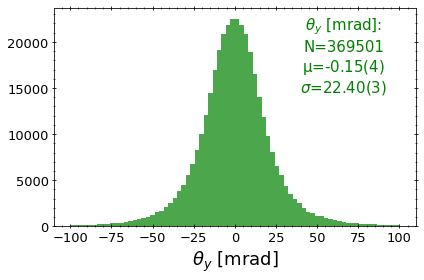

In [5]:
ax, legend = cu.plotHist(df_data['y'][10]*1e3, n_bins=74, prec=2)
cu.textL(ax, 0.8, 0.78, r"$\theta_y$ [mrad]:"+"\n"+str(legend), font_size=15)
ax.set_xlabel(r"$\theta_y$ [mrad]", fontsize=18)
plt.tight_layout()
# ax.plot(bin_centres, gauss(bin_centres, *par), color="red", label='Fit')
plt.savefig("fig/Gaus.png", dpi=300)